### Import modules

In [83]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


### Import Dataset

In [84]:
 pd.set_option('display.max_columns', None)
workers_df = pd.read_csv("../data/raw/factory_workers.csv", sep=',', encoding="mac_roman")

In [85]:
workers_df.head()

,sub_ID,sub_fname,sub_lname,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_coll_IDs,sub_colls_same_sex_prtn,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_fname,sup_lname,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,event_week_in_series,event_day_in_series,event_weekday_num,event_weekday_name,behav_comptype_h,behav_cause_h,actual_efficacy_h,record_comptype,record_cause,recorded_efficacy,recorded_note_from_sup,record_conf_matrix_h
0,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
1,98000001,Rebecca,Bauer,40,F,Shift 1,Team 1,Team Leader,"[98000002, 98000003, 98000004, 98000005, 98000...",0.714285714,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,Susan,Dahl,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.489,Efficacy,None,1.2,None,None
2,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None
3,98000002,Joan,Winter,61,F,Shift 1,Team 2,Team Leader,"[98000001, 98000003, 98000004, 98000005, 98000...",0.714285714,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,Susan,Dahl,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Efficacy,None,1.023,Efficacy,None,0.8,None,None
4,98000003,Elizabeth,Martinez,20,F,Shift 1,Team 3,Team Leader,"[98000001, 98000002, 98000004, 98000005, 98000...",0.714285714,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,Susan,Dahl,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,1,1,4,Friday,Presence,None,None,Presence,None,None,None,None


### Drop Unnecessary Columns

In [86]:
# drop unnecessary columns
unnecessary_cols = ['sub_fname', 'sub_lname','sub_coll_IDs', 'sub_colls_same_sex_prtn','sup_fname', 'sup_lname','event_week_in_series',
 'event_day_in_series','event_weekday_num', 'event_weekday_name', 'recorded_note_from_sup', 'record_conf_matrix_h', 
                   'behav_cause_h', 'record_cause']

workers_df.drop(columns=unnecessary_cols, inplace=True)

In [87]:
# drop all rows with production director as sub_role
workers_df = workers_df[workers_df['sub_role'] != 'Production Director']

In [88]:
# check df
workers_df.head()

,sub_ID,sub_age,sub_sex,sub_shift,sub_team,sub_role,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sub_workstyle_h,sup_ID,sup_age,sup_sub_age_diff,sup_sex,sup_role,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,event_date,behav_comptype_h,actual_efficacy_h,record_comptype,recorded_efficacy
0,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None
1,98000001,40,F,Shift 1,Team 1,Team Leader,0.895,1.000,0.659,0.592,0.799,0.501,0.484,0.676,Group A,98000216,24,-16,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,1.489,Efficacy,1.2
2,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None
3,98000002,61,F,Shift 1,Team 2,Team Leader,0.752,0.563,0.449,0.766,0.872,0.655,0.786,0.908,Group C,98000216,24,-37,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Efficacy,1.023,Efficacy,0.8
4,98000003,20,F,Shift 1,Team 3,Team Leader,0.573,0.907,0.735,0.878,0.985,0.840,0.900,0.777,Group C,98000216,24,4,F,Shift Manager,0.842,0.948,0.971,1/1/2021,Presence,None,Presence,None


### Create target variable column

In [89]:
# create a binary column based on whether a worker resigned or not
workers_df['Resigned'] = [1 if x == 'Resignation' else 0 for x in workers_df['behav_comptype_h']]

### Feature Engineering: Encode Categorical Variables

In [90]:
# Get a list of relevant events
relevant_events = list(workers_df['behav_comptype_h'].unique())
sabotage = relevant_events[-1]
relevant_events = relevant_events[:10]
relevant_events.append(sabotage)
relevant_events

['Presence',
 'Efficacy',
 'Feat',
 'Slip',
 'Sacrifice',
 'Lapse',
 'Idea',
 'Teamwork',
 'Absence',
 'Disruption',
 'Sabotage']

***Count the number of instances each employee had an underrecorded efficacy score***

In [ ]:
# Find a count of underrecorded efficacy for each employee
underrecorded_efficacies = workers_df[workers_df['recorded_efficacy'] < workers_df['actual_efficacy_h']]
underrecorded_efficacies

# Group underrecorded efficacies by sub_ID and get count
efficacy = underrecorded_efficacies.groupby('sub_ID')['recorded_efficacy'].count().reset_index()

# Rename col
efficacy.rename(columns={'recorded_efficacy':'Num Underrecorded Efficacy'}, inplace=True)
efficacy.sort_values(by='Num Underrecorded Efficacy', ascending=False).head()

***Count the number of instances each employee had a mismatched relevant event recorded***

In [ ]:
# Filter df based on relevant events
relevant_events_df = workers_df[workers_df['behav_comptype_h'].isin(relevant_events)]

In [ ]:
# Find a count of mismatched recorded events for each employee
mismatched_events = relevant_events_df[relevant_events_df['behav_comptype_h'] != relevant_events_df['record_comptype']]

# Group by sub_ID and get a count of each mismatched event
events = mismatched_events.groupby('sub_ID')['behav_comptype_h'].count().reset_index()

# Rename column and sort
events.rename(columns={'behav_comptype_h':'Num Mismatched Events'}, inplace=True)
events.sort_values('Num Mismatched Events', ascending=False).head()

In [ ]:
# Merge Mismatched Efficacies and Events 
new_features = efficacy.merge(events, left_on='sub_ID', right_on='sub_ID', how='left')
new_features

In [ ]:
# fill missing values for Mismatched events column with 0
new_features.fillna(0, inplace=True)

# Convert data type to int for mismatched events col
new_features['Num Mismatched Events'] = new_features['Num Mismatched Events'].astype('int')
new_features.dtypes

In [ ]:
# Merge new features to original dataframe
merged_df = workers_df.merge(new_features, left_on='sub_ID', right_on='sub_ID')

### Drop duplicate rows and some Categorical Features

In [ ]:
# drop features already encoded
features_to_drop = ['behav_comptype_h', 'record_comptype', 'actual_efficacy_h', 'recorded_efficacy']
merged_df.drop(columns=features_to_drop, inplace=True)

In [ ]:
# drop duplicate rows based on last event date
df = merged_df.sort_values('event_date').drop_duplicates('sub_ID', keep='last')
df = df.sort_values('sub_ID')

# Convert event_date col to datetime 
df['event_date'] = pd.to_datetime(df['event_date'])

### Create Dummy Variables for Categorical Features

In [ ]:
# Features to encode
cat_vars = ['sub_sex', 'sub_shift', 'sub_team', 'sub_role', 'sub_workstyle_h', 'sup_sex', 'sup_role']

In [ ]:
# Get dummy variables
df = pd.get_dummies(df, columns=cat_vars, prefix=cat_vars, drop_first=True)

In [ ]:
# Inspect encoded features
df.head()

In [ ]:
# Check data types
df.info()

In [ ]:
# get features with object types to convert to int
o_types = df.select_dtypes(include=['object'], exclude=['datetime']).columns.to_list()

# convert to num type
df[o_types] = df[o_types].apply(pd.to_numeric, errors='coerce')

### Create train and test splits

In [ ]:
# Create target variable and feature matrix
X = df.drop(columns=['sub_ID', 'sup_ID', 'event_date', 'Resigned'])
y = df['Resigned']

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# View train set
X_train.head()

### Preprocessing: Standardize Numeric Features

In [91]:
# Get numeric features
num_features = ['sub_age', 'sub_health_h', 'sub_commitment_h',
       'sub_perceptiveness_h', 'sub_dexterity_h', 'sub_sociality_h',
       'sub_goodness_h', 'sub_strength_h', 'sub_openmindedness_h',
       'Num Underrecorded Efficacy', 'Num Mismatched Events', 'sup_age', 'sup_sub_age_diff',
               'sup_commitment_h', 'sup_perceptiveness_h', 'sup_goodness_h']

In [92]:
# instantiate scaler
SS_scaler = StandardScaler()

# fit values to scaler
SS_scaler.fit(X_train[num_features])

# Get standardized values as a new df
X_train[num_features] = SS_scaler.transform(X_train[num_features])


In [93]:
# View train set with updated scaled values
X_train

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_M,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
370709,0.428123,-0.914587,0.152207,1.096111,-2.383802,-0.503301,-0.393163,-0.252666,0.288197,-1.039775,-1.066465,0.839823,1.116892,-1.135247,0.229776,0.449219,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
17045,-0.511479,0.228349,0.233338,1.032979,1.198444,0.699391,0.116665,0.655439,0.275401,0.025133,0.385259,1.793353,-0.414824,-1.260884,0.667967,0.119230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
363625,0.500400,0.946766,1.146059,0.111253,-0.212350,1.613682,-2.031412,1.645526,-0.076513,-0.471824,-0.703534,1.598313,1.406525,-1.078711,0.714916,0.779209,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
407166,-0.077817,0.541840,0.334751,1.247627,1.107425,0.233041,0.116665,-1.816624,-1.324205,1.374017,1.059274,0.160794,1.345257,0.504312,-1.992479,-1.530718,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
15038,-0.366925,0.097728,1.477344,-1.037748,-0.160339,-0.073769,1.143120,0.970753,-1.010682,1.019047,1.007427,1.547747,0.381669,1.440306,-1.303893,-1.530718,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408167,-0.656034,1.194946,0.084598,0.767825,1.517010,-0.178084,0.259417,0.447332,-0.204481,1.374017,1.474052,0.160794,1.345257,0.504312,-1.444740,-0.540749,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
302336,0.211292,1.371285,0.997320,1.418084,-0.517913,-1.460546,0.007902,1.330212,0.563330,0.522090,0.229718,-1.125028,0.426228,-0.350018,0.918362,2.099167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
381403,-0.800588,-0.339854,0.476730,0.041808,-0.478905,-0.067632,-1.100126,1.267149,0.608119,-0.613812,0.126023,0.074109,-1.333853,0.611104,-0.114517,-0.870739,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
300710,0.572678,0.515716,1.342126,-0.488501,0.333764,-0.116722,-0.780633,-0.252666,0.928040,0.451096,-0.081366,0.695348,0.398378,-0.814874,0.980961,0.119230,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [94]:
# Show new standardized features
scaled_data = pd.DataFrame(X_train[num_features], columns=num_features)

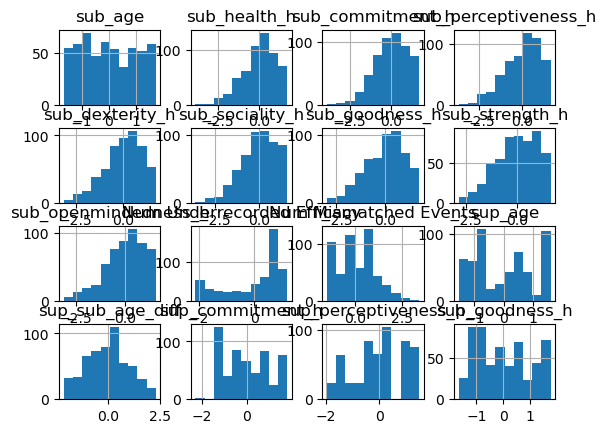

In [95]:
# Visualize shape of features 
scaled_data.hist()
plt.show()

In [96]:
X_train

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_M,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
370709,0.428123,-0.914587,0.152207,1.096111,-2.383802,-0.503301,-0.393163,-0.252666,0.288197,-1.039775,-1.066465,0.839823,1.116892,-1.135247,0.229776,0.449219,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
17045,-0.511479,0.228349,0.233338,1.032979,1.198444,0.699391,0.116665,0.655439,0.275401,0.025133,0.385259,1.793353,-0.414824,-1.260884,0.667967,0.119230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
363625,0.500400,0.946766,1.146059,0.111253,-0.212350,1.613682,-2.031412,1.645526,-0.076513,-0.471824,-0.703534,1.598313,1.406525,-1.078711,0.714916,0.779209,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
407166,-0.077817,0.541840,0.334751,1.247627,1.107425,0.233041,0.116665,-1.816624,-1.324205,1.374017,1.059274,0.160794,1.345257,0.504312,-1.992479,-1.530718,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
15038,-0.366925,0.097728,1.477344,-1.037748,-0.160339,-0.073769,1.143120,0.970753,-1.010682,1.019047,1.007427,1.547747,0.381669,1.440306,-1.303893,-1.530718,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408167,-0.656034,1.194946,0.084598,0.767825,1.517010,-0.178084,0.259417,0.447332,-0.204481,1.374017,1.474052,0.160794,1.345257,0.504312,-1.444740,-0.540749,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
302336,0.211292,1.371285,0.997320,1.418084,-0.517913,-1.460546,0.007902,1.330212,0.563330,0.522090,0.229718,-1.125028,0.426228,-0.350018,0.918362,2.099167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
381403,-0.800588,-0.339854,0.476730,0.041808,-0.478905,-0.067632,-1.100126,1.267149,0.608119,-0.613812,0.126023,0.074109,-1.333853,0.611104,-0.114517,-0.870739,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
300710,0.572678,0.515716,1.342126,-0.488501,0.333764,-0.116722,-0.780633,-0.252666,0.928040,0.451096,-0.081366,0.695348,0.398378,-0.814874,0.980961,0.119230,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Check for Outliers with Boxplots

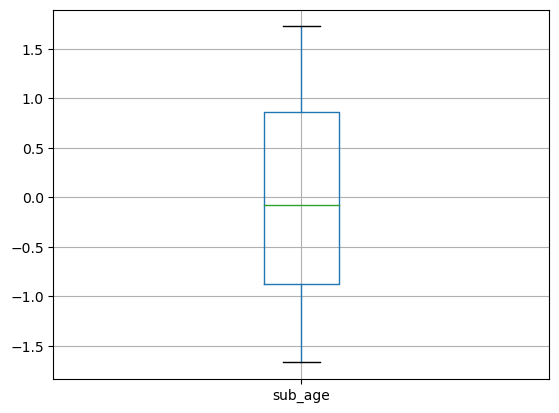

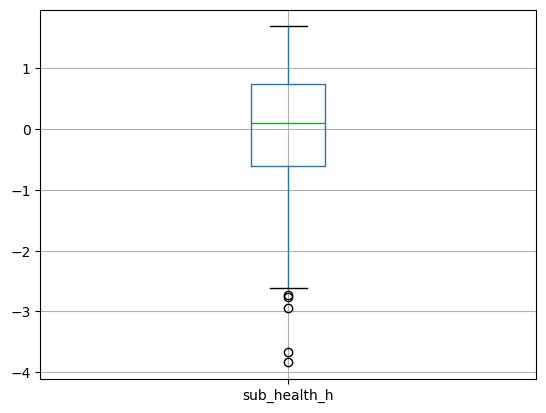

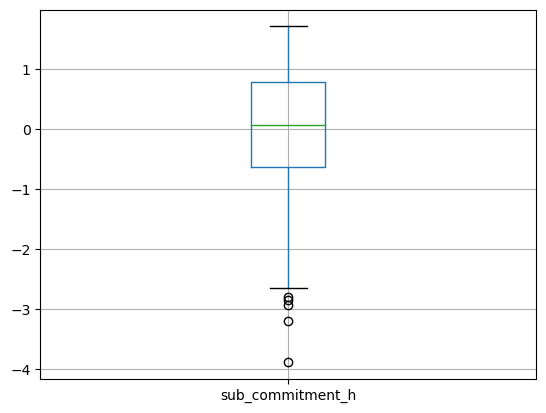

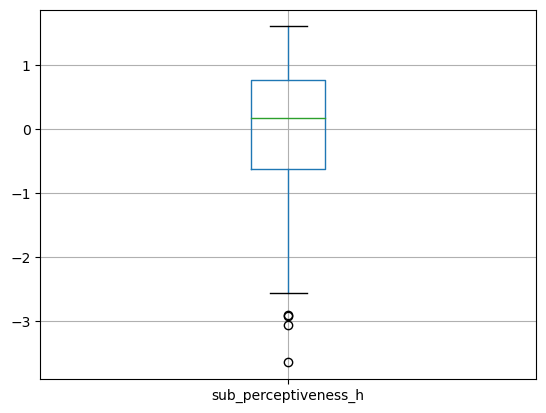

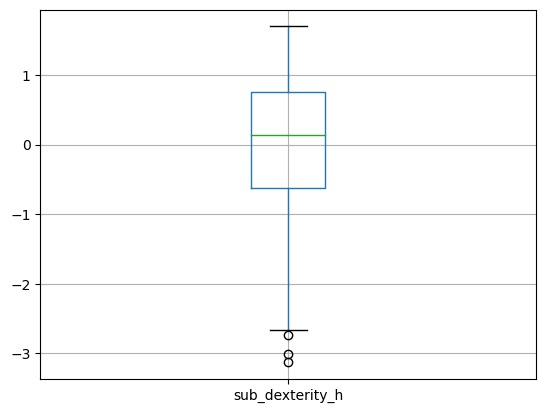

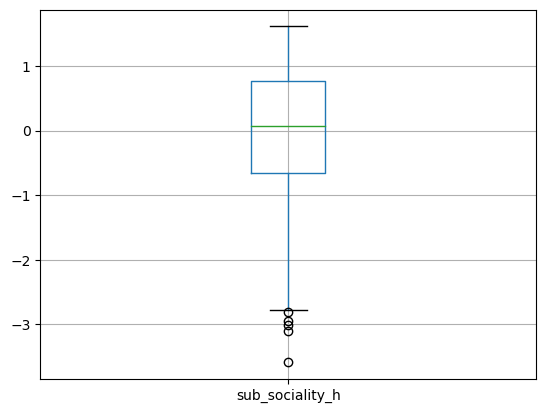

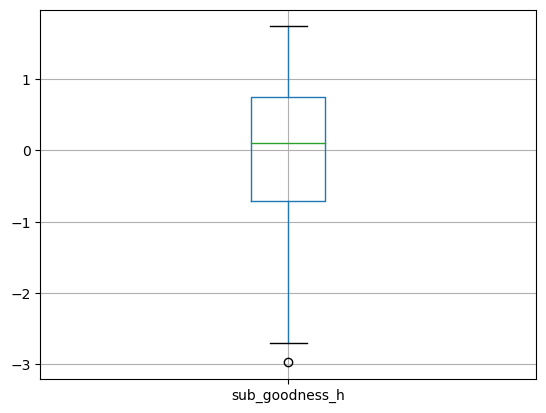

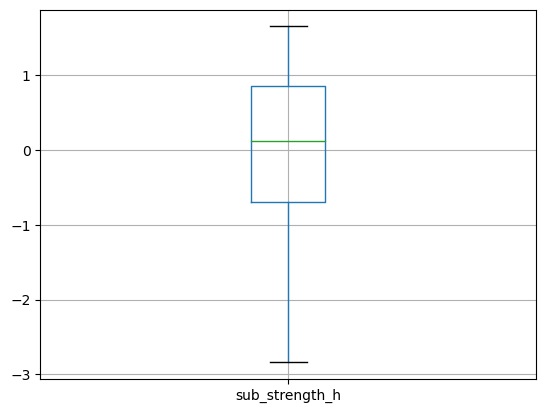

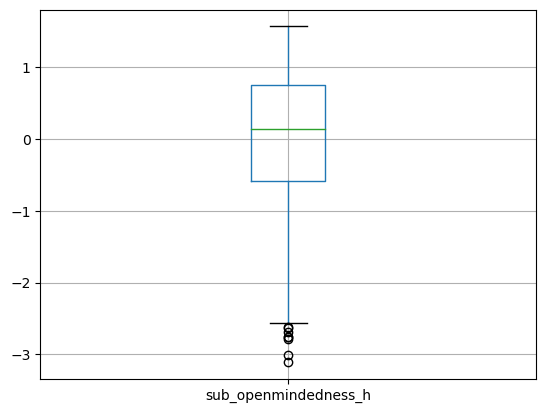

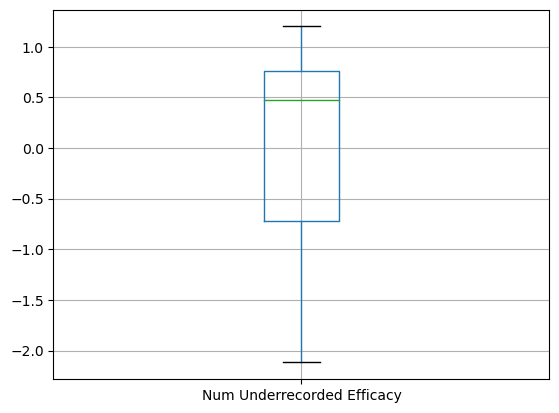

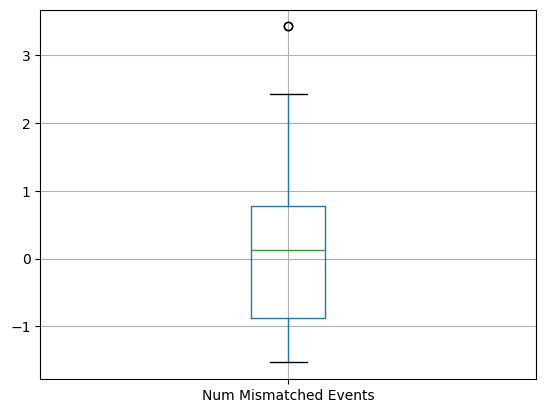

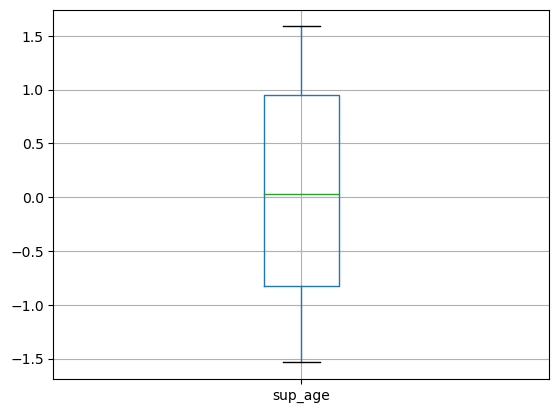

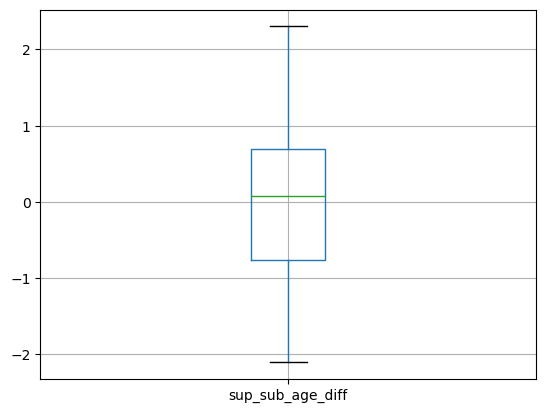

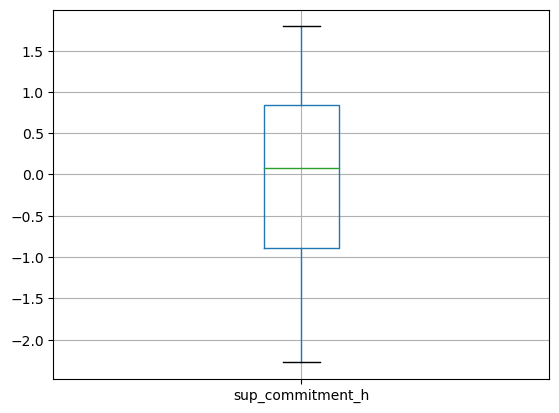

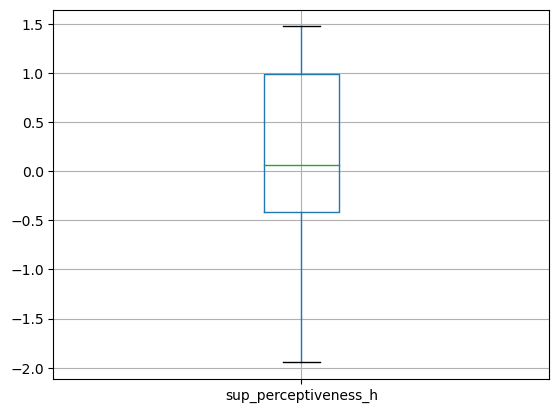

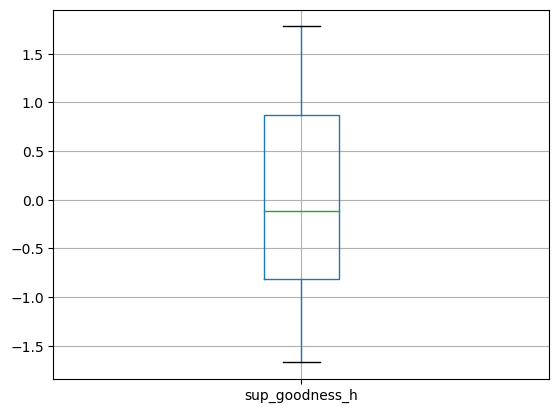

In [98]:
for feature in X_train[num_features].columns:
    X_train[[feature]].boxplot()
    plt.show()